# Corrigé exos série 2

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Afficher l'histogramme du nombre d'hommes et de femmes

<Axes: xlabel='Sex'>

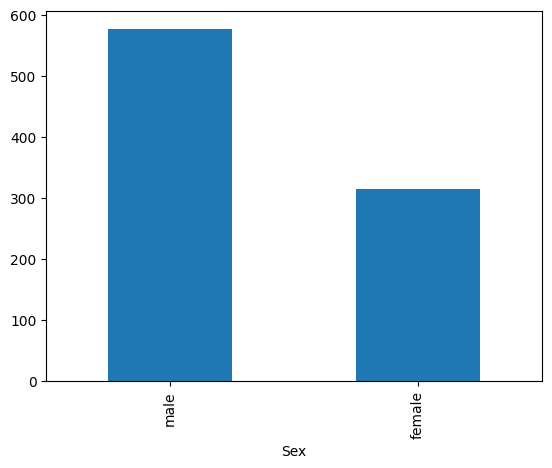

In [20]:
titanic.Sex.value_counts().plot(kind="bar")

<Axes: >

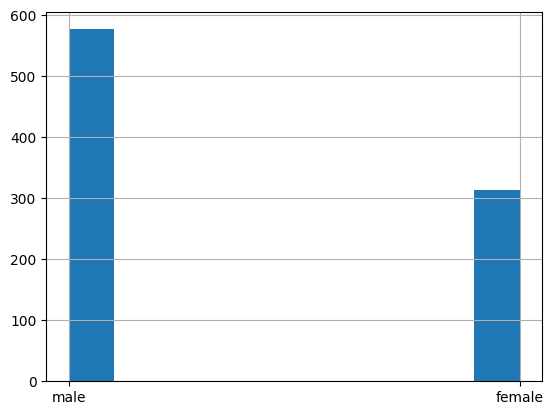

In [21]:
titanic.Sex.hist()

## Analyser la répartition des ages des passagers

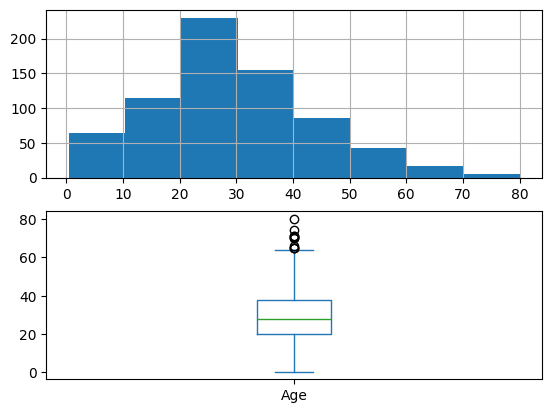

In [22]:
fig, axs = plt.subplots(2)
titanic.Age.hist(ax=axs[0], bins=8)
titanic.Age.plot.box(ax=axs[1])
plt.show()

## Analyser le lien entre la survie et le sexe

In [ ]:
titanic["Did survive"] = ["yes" if x == 0 else "no" for x in titanic["Survived"]]
survive_df = titanic[titanic["Survived"] == 0][["Sex", "Age"]]
survive_df.head()

,Sex,Age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


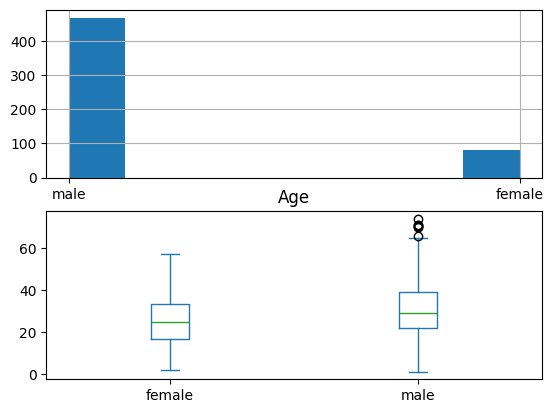

In [38]:
fig, axs = plt.subplots(2)
survive_df["Sex"].hist(ax=axs[0], bins=8)
survive_df.plot.box(by="Sex", ax=axs[1])
plt.show()

In [49]:
pct_male = 100 * (1 - titanic.loc[titanic["Sex"] == "male", "Survived"].mean())
pct_female = 100 * (1 - titanic.loc[titanic["Sex"] == "female", "Survived"].mean()) 
pct_survived = {
  "Sex": ["male", "female"],
  "Survived percentage": [pct_male, pct_female],
}
pct_survived

{'Sex': ['male', 'female'],
 'Survived percentage': [np.float64(81.10918544194108),
  np.float64(25.79617834394905)]}

<Axes: xlabel='Sex'>

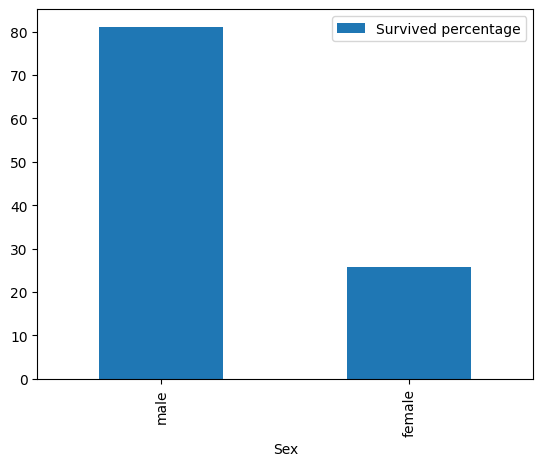

In [57]:
pct_survived_df = pd.DataFrame(pct_survived)
pct_survived_df.plot.bar(x="Sex")